# Spectral Construction

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## 

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


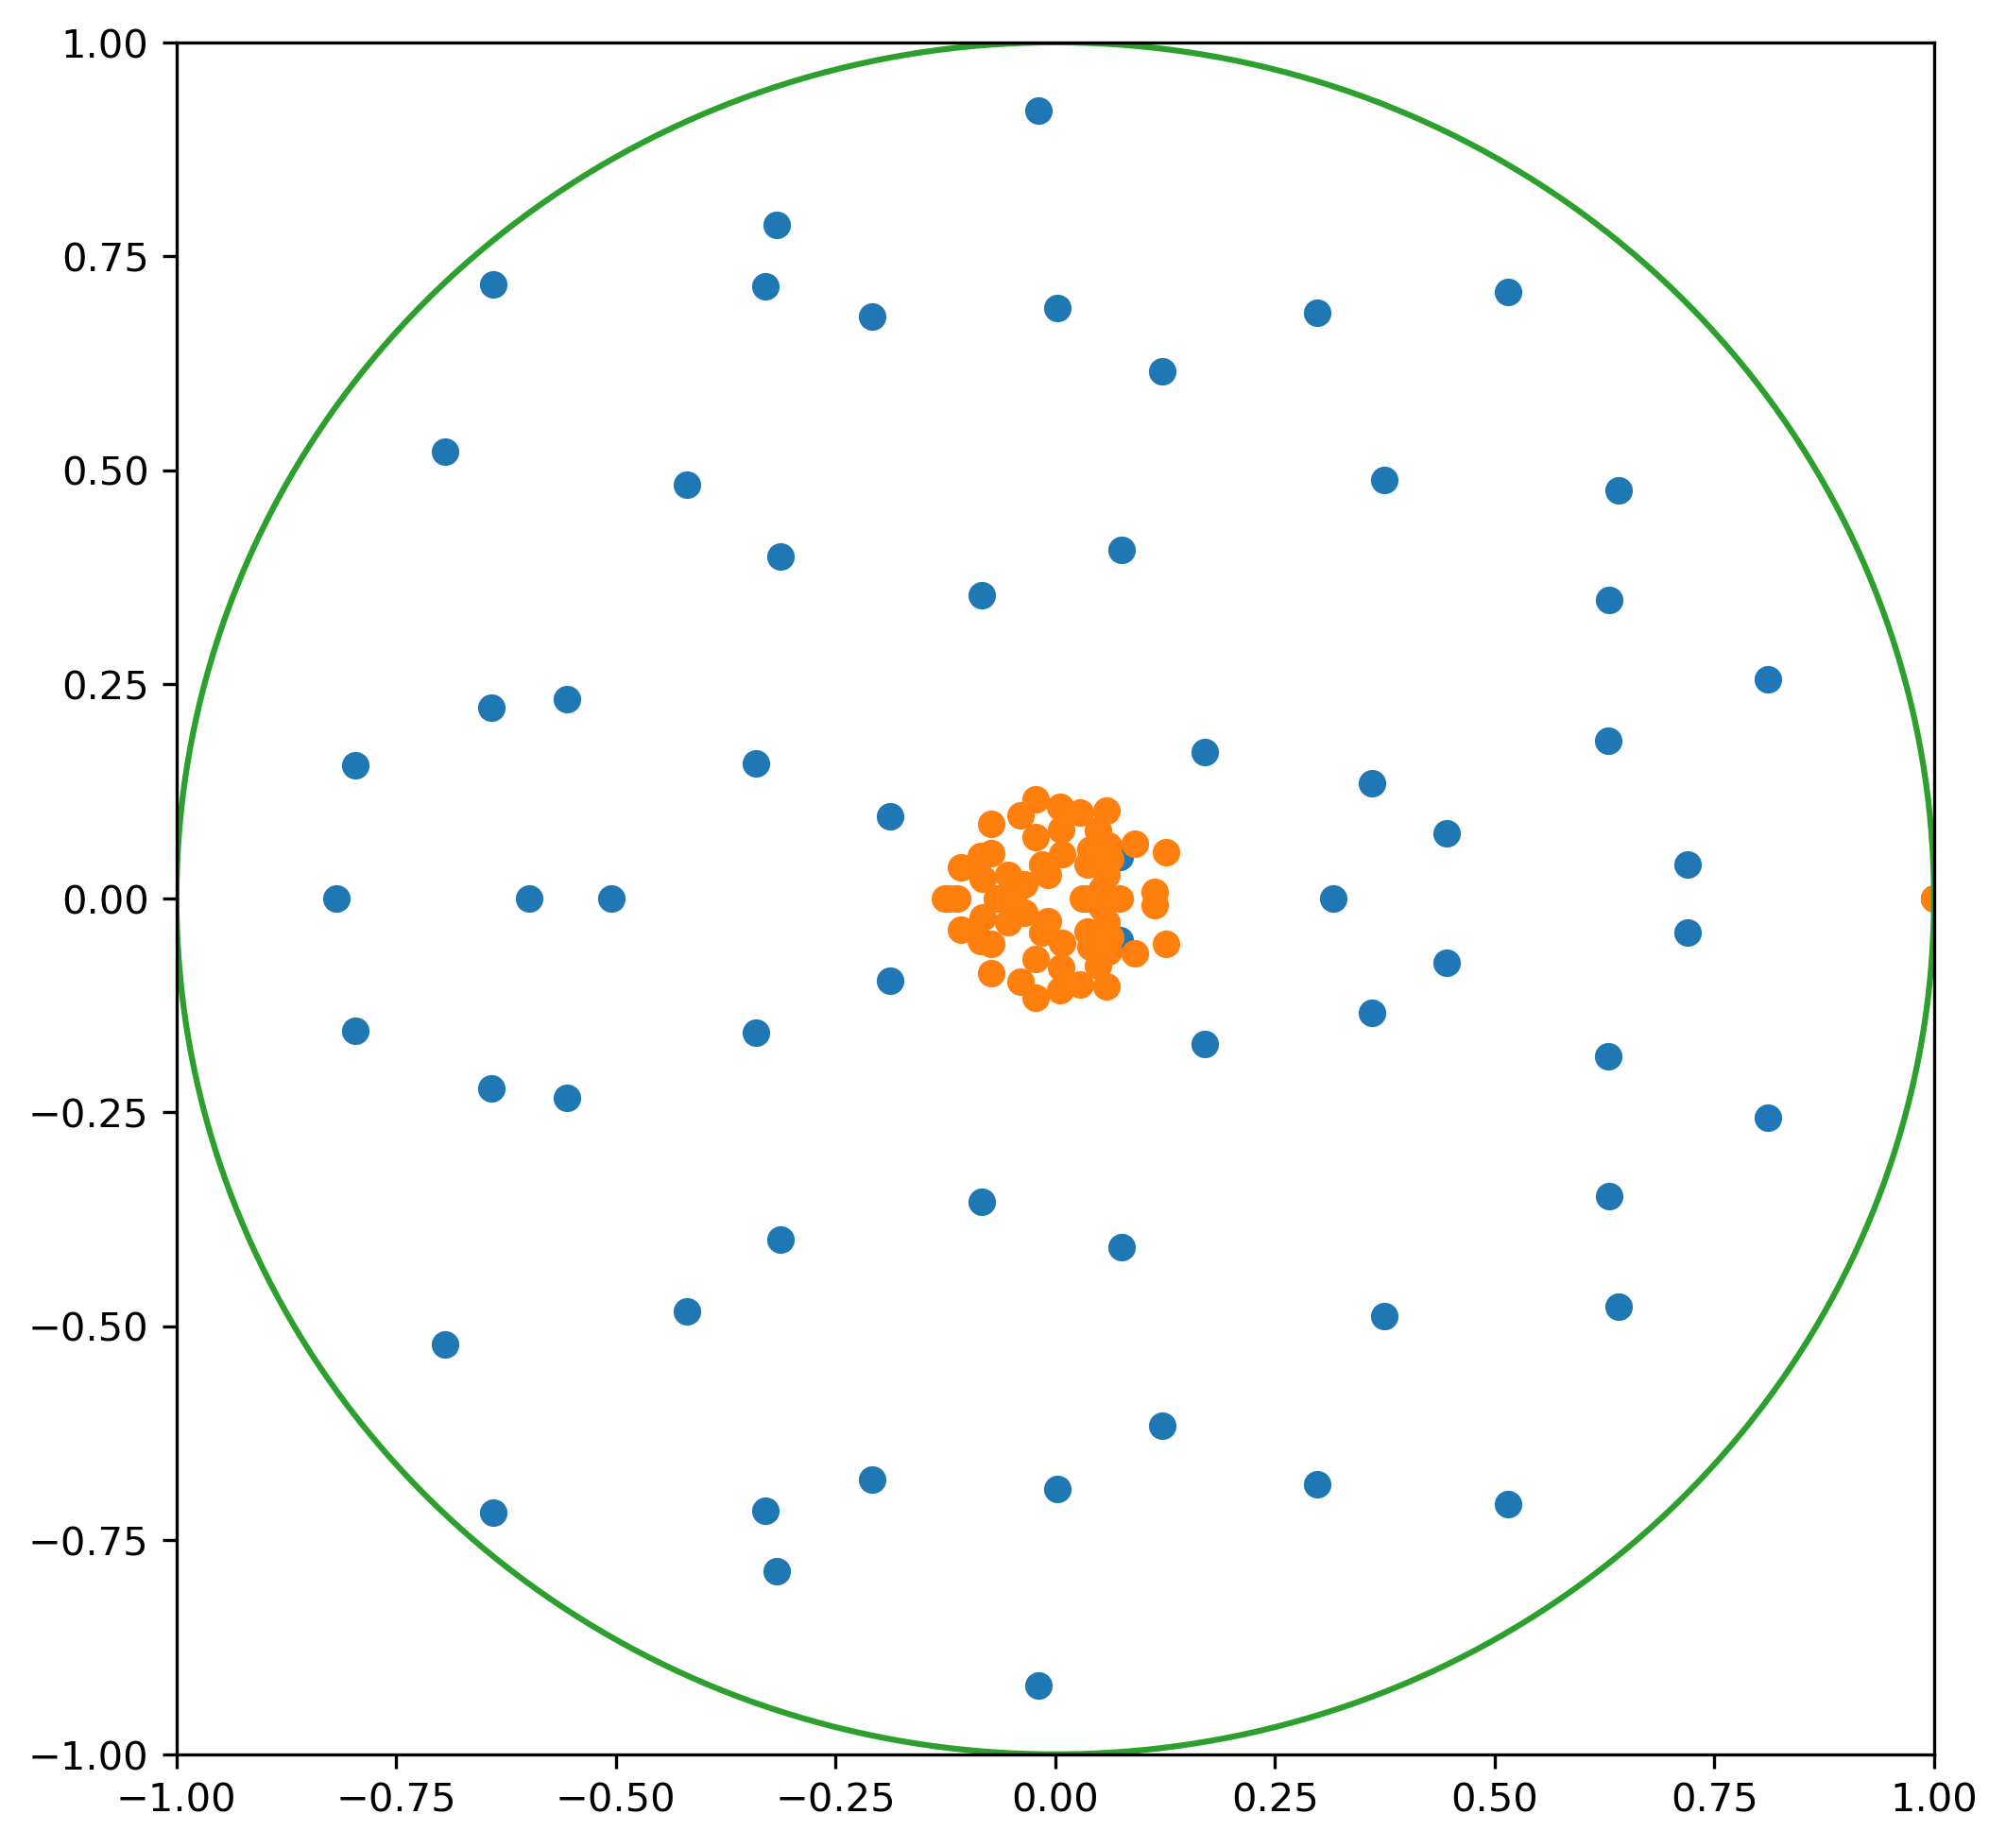

In [2]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

kraus_target = KrausMap(d = d, 
                        rank = d**2,
                        )

kraus_model = KrausMap(d = d, 
                       rank = d**2,
                      )

choi_target1 = maps_to_choi([kraus_target])
choi_model1 = maps_to_choi([kraus_model])

spectrum_target = choi_spectrum(choi_target1)
spectrum_model = choi_spectrum(choi_model1)

spectrum_target = [spectrum_target[0].numpy(), spectrum_target[1].numpy()]
spectrum_target = [7.5*spectrum_target[0], 7.5*spectrum_target[1]]
spectrum_target[0][-1] = 1 
spectrum_target[1][-1] = 0

spectrum_target = [tf.cast(spectrum_target[0], dtype = precision), tf.cast(spectrum_target[1], dtype = precision)]

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [3]:
model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = SpectrumDistance(sigma=0.25),
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [4]:
model.train(inputs = [spectrum_target],
            targets = [],
            num_iter = 2000,
            N = 1,
            use_batch = False,
            )

  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 11832.60420, val: 0.00000
Step:1, train: 11625.03577, val: 0.00000
Step:2, train: 11452.42775, val: 0.00000
Step:3, train: 11292.93251, val: 0.00000
Step:4, train: 11141.26601, val: 0.00000
Step:5, train: 10994.99276, val: 0.00000
Step:6, train: 10852.93568, val: 0.00000
Step:7, train: 10714.40629, val: 0.00000
Step:8, train: 10578.70743, val: 0.00000
Step:9, train: 10445.87208, val: 0.00000
Step:10, train: 10315.61406, val: 0.00000
Step:11, train: 10187.85005, val: 0.00000
Step:12, train: 10062.20621, val: 0.00000
Step:13, train: 9938.85540, val: 0.00000
Step:14, train: 9817.13920, val: 0.00000
Step:15, train: 9697.55481, val: 0.00000
Step:16, train: 9579.65609, val: 0.00000
Step:17, train: 9463.43452, val: 0.00000
Step:18, train: 9348.83006, val: 0.00000
Step:19, train: 9235.74696, val: 0.00000
Step:20, train: 9124.02220, val: 0.00000
Step:21, train: 9013.76164, val: 0.00000
Step:22, train: 8904.79788, val: 0.00000
Step:23, train: 8796.94925, val: 0.00000
Step:24, trai

Step:198, train: 1309.95301, val: 0.00000
Step:199, train: 1300.81078, val: 0.00000
Step:200, train: 1291.65994, val: 0.00000
Step:201, train: 1282.73412, val: 0.00000
Step:202, train: 1274.03986, val: 0.00000
Step:203, train: 1265.56915, val: 0.00000
Step:204, train: 1257.30887, val: 0.00000
Step:205, train: 1249.24789, val: 0.00000
Step:206, train: 1241.37326, val: 0.00000
Step:207, train: 1233.66226, val: 0.00000
Step:208, train: 1226.04177, val: 0.00000
Step:209, train: 1218.34653, val: 0.00000
Step:210, train: 1210.58005, val: 0.00000
Step:211, train: 1202.88269, val: 0.00000
Step:212, train: 1195.29552, val: 0.00000
Step:213, train: 1187.84020, val: 0.00000
Step:214, train: 1180.59139, val: 0.00000
Step:215, train: 1173.52681, val: 0.00000
Step:216, train: 1166.64851, val: 0.00000
Step:217, train: 1159.98000, val: 0.00000
Step:218, train: 1153.54770, val: 0.00000
Step:219, train: 1147.36251, val: 0.00000
Step:220, train: 1141.39767, val: 0.00000
Step:221, train: 1135.64102, val: 

Step:397, train: 829.33814, val: 0.00000
Step:398, train: 828.75305, val: 0.00000
Step:399, train: 828.17189, val: 0.00000
Step:400, train: 827.59458, val: 0.00000
Step:401, train: 827.02107, val: 0.00000
Step:402, train: 826.45131, val: 0.00000
Step:403, train: 825.88525, val: 0.00000
Step:404, train: 825.32284, val: 0.00000
Step:405, train: 824.76404, val: 0.00000
Step:406, train: 824.20878, val: 0.00000
Step:407, train: 823.65704, val: 0.00000
Step:408, train: 823.10876, val: 0.00000
Step:409, train: 822.56389, val: 0.00000
Step:410, train: 822.02241, val: 0.00000
Step:411, train: 821.48426, val: 0.00000
Step:412, train: 820.94942, val: 0.00000
Step:413, train: 820.41784, val: 0.00000
Step:414, train: 819.88946, val: 0.00000
Step:415, train: 819.36425, val: 0.00000
Step:416, train: 818.84220, val: 0.00000
Step:417, train: 818.32324, val: 0.00000
Step:418, train: 817.80737, val: 0.00000
Step:419, train: 817.29456, val: 0.00000
Step:420, train: 816.78479, val: 0.00000
Step:421, train:

Step:597, train: 761.50966, val: 0.00000
Step:598, train: 761.34579, val: 0.00000
Step:599, train: 761.18306, val: 0.00000
Step:600, train: 761.02145, val: 0.00000
Step:601, train: 760.86096, val: 0.00000
Step:602, train: 760.70157, val: 0.00000
Step:603, train: 760.54328, val: 0.00000
Step:604, train: 760.38608, val: 0.00000
Step:605, train: 760.22997, val: 0.00000
Step:606, train: 760.07493, val: 0.00000
Step:607, train: 759.92097, val: 0.00000
Step:608, train: 759.76806, val: 0.00000
Step:609, train: 759.61622, val: 0.00000
Step:610, train: 759.46542, val: 0.00000
Step:611, train: 759.31566, val: 0.00000
Step:612, train: 759.16694, val: 0.00000
Step:613, train: 759.01925, val: 0.00000
Step:614, train: 758.87257, val: 0.00000
Step:615, train: 758.72691, val: 0.00000
Step:616, train: 758.58226, val: 0.00000
Step:617, train: 758.43861, val: 0.00000
Step:618, train: 758.29595, val: 0.00000
Step:619, train: 758.15428, val: 0.00000
Step:620, train: 758.01359, val: 0.00000
Step:621, train:

Step:797, train: 743.79329, val: 0.00000
Step:798, train: 743.75295, val: 0.00000
Step:799, train: 743.71289, val: 0.00000
Step:800, train: 743.67310, val: 0.00000
Step:801, train: 743.63360, val: 0.00000
Step:802, train: 743.59436, val: 0.00000
Step:803, train: 743.55540, val: 0.00000
Step:804, train: 743.51671, val: 0.00000
Step:805, train: 743.47829, val: 0.00000
Step:806, train: 743.44014, val: 0.00000
Step:807, train: 743.40225, val: 0.00000
Step:808, train: 743.36462, val: 0.00000
Step:809, train: 743.32725, val: 0.00000
Step:810, train: 743.29014, val: 0.00000
Step:811, train: 743.25329, val: 0.00000
Step:812, train: 743.21670, val: 0.00000
Step:813, train: 743.18035, val: 0.00000
Step:814, train: 743.14426, val: 0.00000
Step:815, train: 743.10842, val: 0.00000
Step:816, train: 743.07282, val: 0.00000
Step:817, train: 743.03747, val: 0.00000
Step:818, train: 743.00237, val: 0.00000
Step:819, train: 742.96751, val: 0.00000
Step:820, train: 742.93288, val: 0.00000
Step:821, train:

Step:997, train: 739.35521, val: 0.00000
Step:998, train: 739.34429, val: 0.00000
Step:999, train: 739.33344, val: 0.00000
Step:1000, train: 739.32266, val: 0.00000
Step:1001, train: 739.31193, val: 0.00000
Step:1002, train: 739.30127, val: 0.00000
Step:1003, train: 739.29067, val: 0.00000
Step:1004, train: 739.28013, val: 0.00000
Step:1005, train: 739.26965, val: 0.00000
Step:1006, train: 739.25924, val: 0.00000
Step:1007, train: 739.24888, val: 0.00000
Step:1008, train: 739.23858, val: 0.00000
Step:1009, train: 739.22834, val: 0.00000
Step:1010, train: 739.21816, val: 0.00000
Step:1011, train: 739.20804, val: 0.00000
Step:1012, train: 739.19797, val: 0.00000
Step:1013, train: 739.18797, val: 0.00000
Step:1014, train: 739.17802, val: 0.00000
Step:1015, train: 739.16812, val: 0.00000
Step:1016, train: 739.15829, val: 0.00000
Step:1017, train: 739.14851, val: 0.00000
Step:1018, train: 739.13878, val: 0.00000
Step:1019, train: 739.12911, val: 0.00000
Step:1020, train: 739.11949, val: 0.0

Step:1193, train: 738.01565, val: 0.00000
Step:1194, train: 738.01142, val: 0.00000
Step:1195, train: 738.00721, val: 0.00000
Step:1196, train: 738.00301, val: 0.00000
Step:1197, train: 737.99883, val: 0.00000
Step:1198, train: 737.99466, val: 0.00000
Step:1199, train: 737.99051, val: 0.00000
Step:1200, train: 737.98637, val: 0.00000
Step:1201, train: 737.98225, val: 0.00000
Step:1202, train: 737.97815, val: 0.00000
Step:1203, train: 737.97406, val: 0.00000
Step:1204, train: 737.96998, val: 0.00000
Step:1205, train: 737.96592, val: 0.00000
Step:1206, train: 737.96188, val: 0.00000
Step:1207, train: 737.95785, val: 0.00000
Step:1208, train: 737.95383, val: 0.00000
Step:1209, train: 737.94983, val: 0.00000
Step:1210, train: 737.94584, val: 0.00000
Step:1211, train: 737.94187, val: 0.00000
Step:1212, train: 737.93791, val: 0.00000
Step:1213, train: 737.93397, val: 0.00000
Step:1214, train: 737.93004, val: 0.00000
Step:1215, train: 737.92612, val: 0.00000
Step:1216, train: 737.92222, val: 

Step:1389, train: 737.39957, val: 0.00000
Step:1390, train: 737.39719, val: 0.00000
Step:1391, train: 737.39481, val: 0.00000
Step:1392, train: 737.39243, val: 0.00000
Step:1393, train: 737.39006, val: 0.00000
Step:1394, train: 737.38770, val: 0.00000
Step:1395, train: 737.38534, val: 0.00000
Step:1396, train: 737.38299, val: 0.00000
Step:1397, train: 737.38064, val: 0.00000
Step:1398, train: 737.37830, val: 0.00000
Step:1399, train: 737.37596, val: 0.00000
Step:1400, train: 737.37363, val: 0.00000
Step:1401, train: 737.37130, val: 0.00000
Step:1402, train: 737.36898, val: 0.00000
Step:1403, train: 737.36666, val: 0.00000
Step:1404, train: 737.36435, val: 0.00000
Step:1405, train: 737.36204, val: 0.00000
Step:1406, train: 737.35974, val: 0.00000
Step:1407, train: 737.35744, val: 0.00000
Step:1408, train: 737.35515, val: 0.00000
Step:1409, train: 737.35286, val: 0.00000
Step:1410, train: 737.35057, val: 0.00000
Step:1411, train: 737.34830, val: 0.00000
Step:1412, train: 737.34602, val: 

Step:1585, train: 737.01148, val: 0.00000
Step:1586, train: 737.00983, val: 0.00000
Step:1587, train: 737.00817, val: 0.00000
Step:1588, train: 737.00652, val: 0.00000
Step:1589, train: 737.00488, val: 0.00000
Step:1590, train: 737.00323, val: 0.00000
Step:1591, train: 737.00159, val: 0.00000
Step:1592, train: 736.99995, val: 0.00000
Step:1593, train: 736.99831, val: 0.00000
Step:1594, train: 736.99667, val: 0.00000
Step:1595, train: 736.99504, val: 0.00000
Step:1596, train: 736.99341, val: 0.00000
Step:1597, train: 736.99178, val: 0.00000
Step:1598, train: 736.99016, val: 0.00000
Step:1599, train: 736.98854, val: 0.00000
Step:1600, train: 736.98692, val: 0.00000
Step:1601, train: 736.98530, val: 0.00000
Step:1602, train: 736.98368, val: 0.00000
Step:1603, train: 736.98207, val: 0.00000
Step:1604, train: 736.98046, val: 0.00000
Step:1605, train: 736.97886, val: 0.00000
Step:1606, train: 736.97725, val: 0.00000
Step:1607, train: 736.97565, val: 0.00000
Step:1608, train: 736.97405, val: 

Step:1781, train: 736.73029, val: 0.00000
Step:1782, train: 736.72905, val: 0.00000
Step:1783, train: 736.72781, val: 0.00000
Step:1784, train: 736.72657, val: 0.00000
Step:1785, train: 736.72533, val: 0.00000
Step:1786, train: 736.72410, val: 0.00000
Step:1787, train: 736.72287, val: 0.00000
Step:1788, train: 736.72164, val: 0.00000
Step:1789, train: 736.72041, val: 0.00000
Step:1790, train: 736.71918, val: 0.00000
Step:1791, train: 736.71795, val: 0.00000
Step:1792, train: 736.71673, val: 0.00000
Step:1793, train: 736.71551, val: 0.00000
Step:1794, train: 736.71429, val: 0.00000
Step:1795, train: 736.71307, val: 0.00000
Step:1796, train: 736.71185, val: 0.00000
Step:1797, train: 736.71063, val: 0.00000
Step:1798, train: 736.70942, val: 0.00000
Step:1799, train: 736.70821, val: 0.00000
Step:1800, train: 736.70699, val: 0.00000
Step:1801, train: 736.70579, val: 0.00000
Step:1802, train: 736.70458, val: 0.00000
Step:1803, train: 736.70337, val: 0.00000
Step:1804, train: 736.70217, val: 

Step:1977, train: 736.51615, val: 0.00000
Step:1978, train: 736.51519, val: 0.00000
Step:1979, train: 736.51424, val: 0.00000
Step:1980, train: 736.51328, val: 0.00000
Step:1981, train: 736.51233, val: 0.00000
Step:1982, train: 736.51137, val: 0.00000
Step:1983, train: 736.51042, val: 0.00000
Step:1984, train: 736.50947, val: 0.00000
Step:1985, train: 736.50852, val: 0.00000
Step:1986, train: 736.50757, val: 0.00000
Step:1987, train: 736.50662, val: 0.00000
Step:1988, train: 736.50568, val: 0.00000
Step:1989, train: 736.50473, val: 0.00000
Step:1990, train: 736.50379, val: 0.00000
Step:1991, train: 736.50285, val: 0.00000
Step:1992, train: 736.50190, val: 0.00000
Step:1993, train: 736.50096, val: 0.00000
Step:1994, train: 736.50002, val: 0.00000
Step:1995, train: 736.49909, val: 0.00000
Step:1996, train: 736.49815, val: 0.00000
Step:1997, train: 736.49721, val: 0.00000
Step:1998, train: 736.49628, val: 0.00000
Step:1999, train: 736.49535, val: 0.00000
736.4953469267653 0


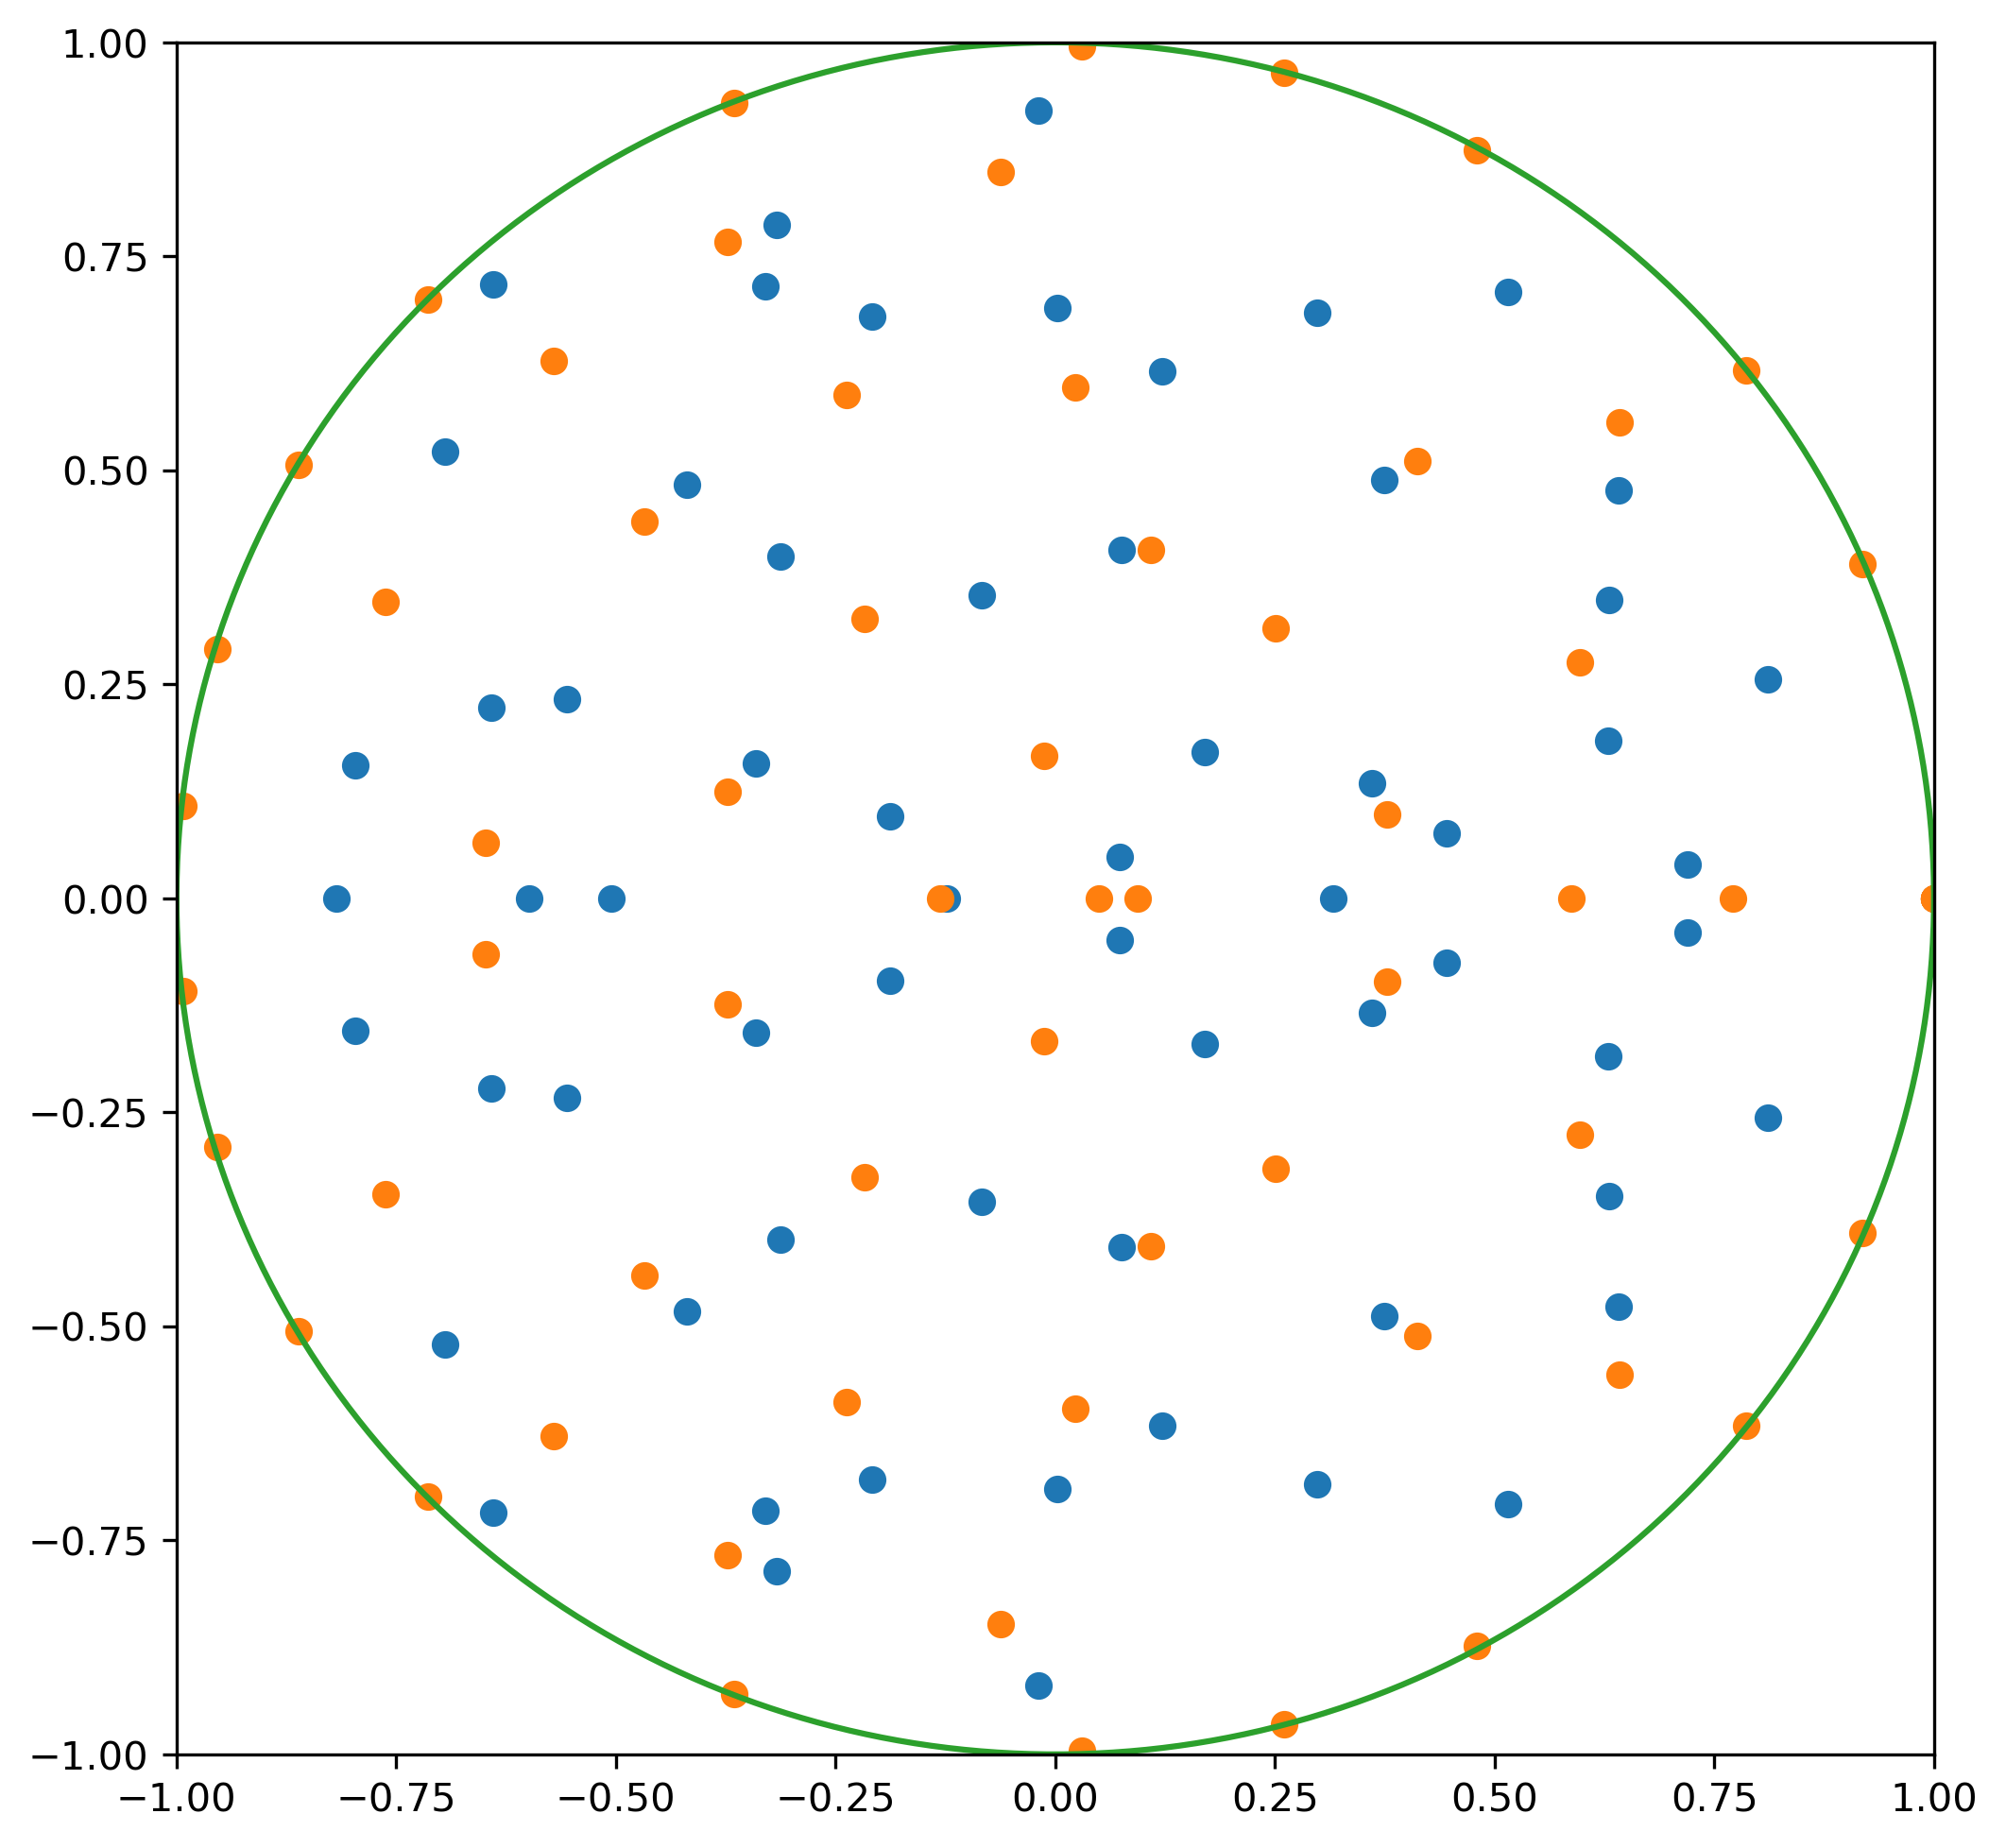

In [5]:
choi_model1 = maps_to_choi([kraus_model])
spectrum_model = choi_spectrum(choi_model1)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [9]:
steady = choi_steady_state(choi_model1)

In [11]:
print(tf.linalg.trace(steady))

tf.Tensor((2.6755903216653008+7.216449660063518e-16j), shape=(), dtype=complex128)


In [8]:
model.zero_optimizer()
model.loss.sigma=0.025

In [ ]:
model.train(inputs = [kraus_target],
            targets = [],
            num_iter = 30,
            N = 1,
            use_batch = False,
            )

  0%|          | 0/30 [00:00<?, ?it/s]

Step:0, train: 975.43330, val: 0.00000
Step:1, train: 968.77630, val: 0.00000
Step:2, train: 959.56127, val: 0.00000
Step:3, train: 942.85910, val: 0.00000
Step:4, train: 925.39614, val: 0.00000
Step:5, train: 908.41066, val: 0.00000
Step:6, train: 898.65213, val: 0.00000
Step:7, train: 901.67160, val: 0.00000
Step:8, train: 906.29147, val: 0.00000
Step:9, train: 899.49898, val: 0.00000
Step:10, train: 886.54495, val: 0.00000
Step:11, train: 876.36225, val: 0.00000
Step:12, train: 865.31225, val: 0.00000
Step:13, train: 855.98377, val: 0.00000


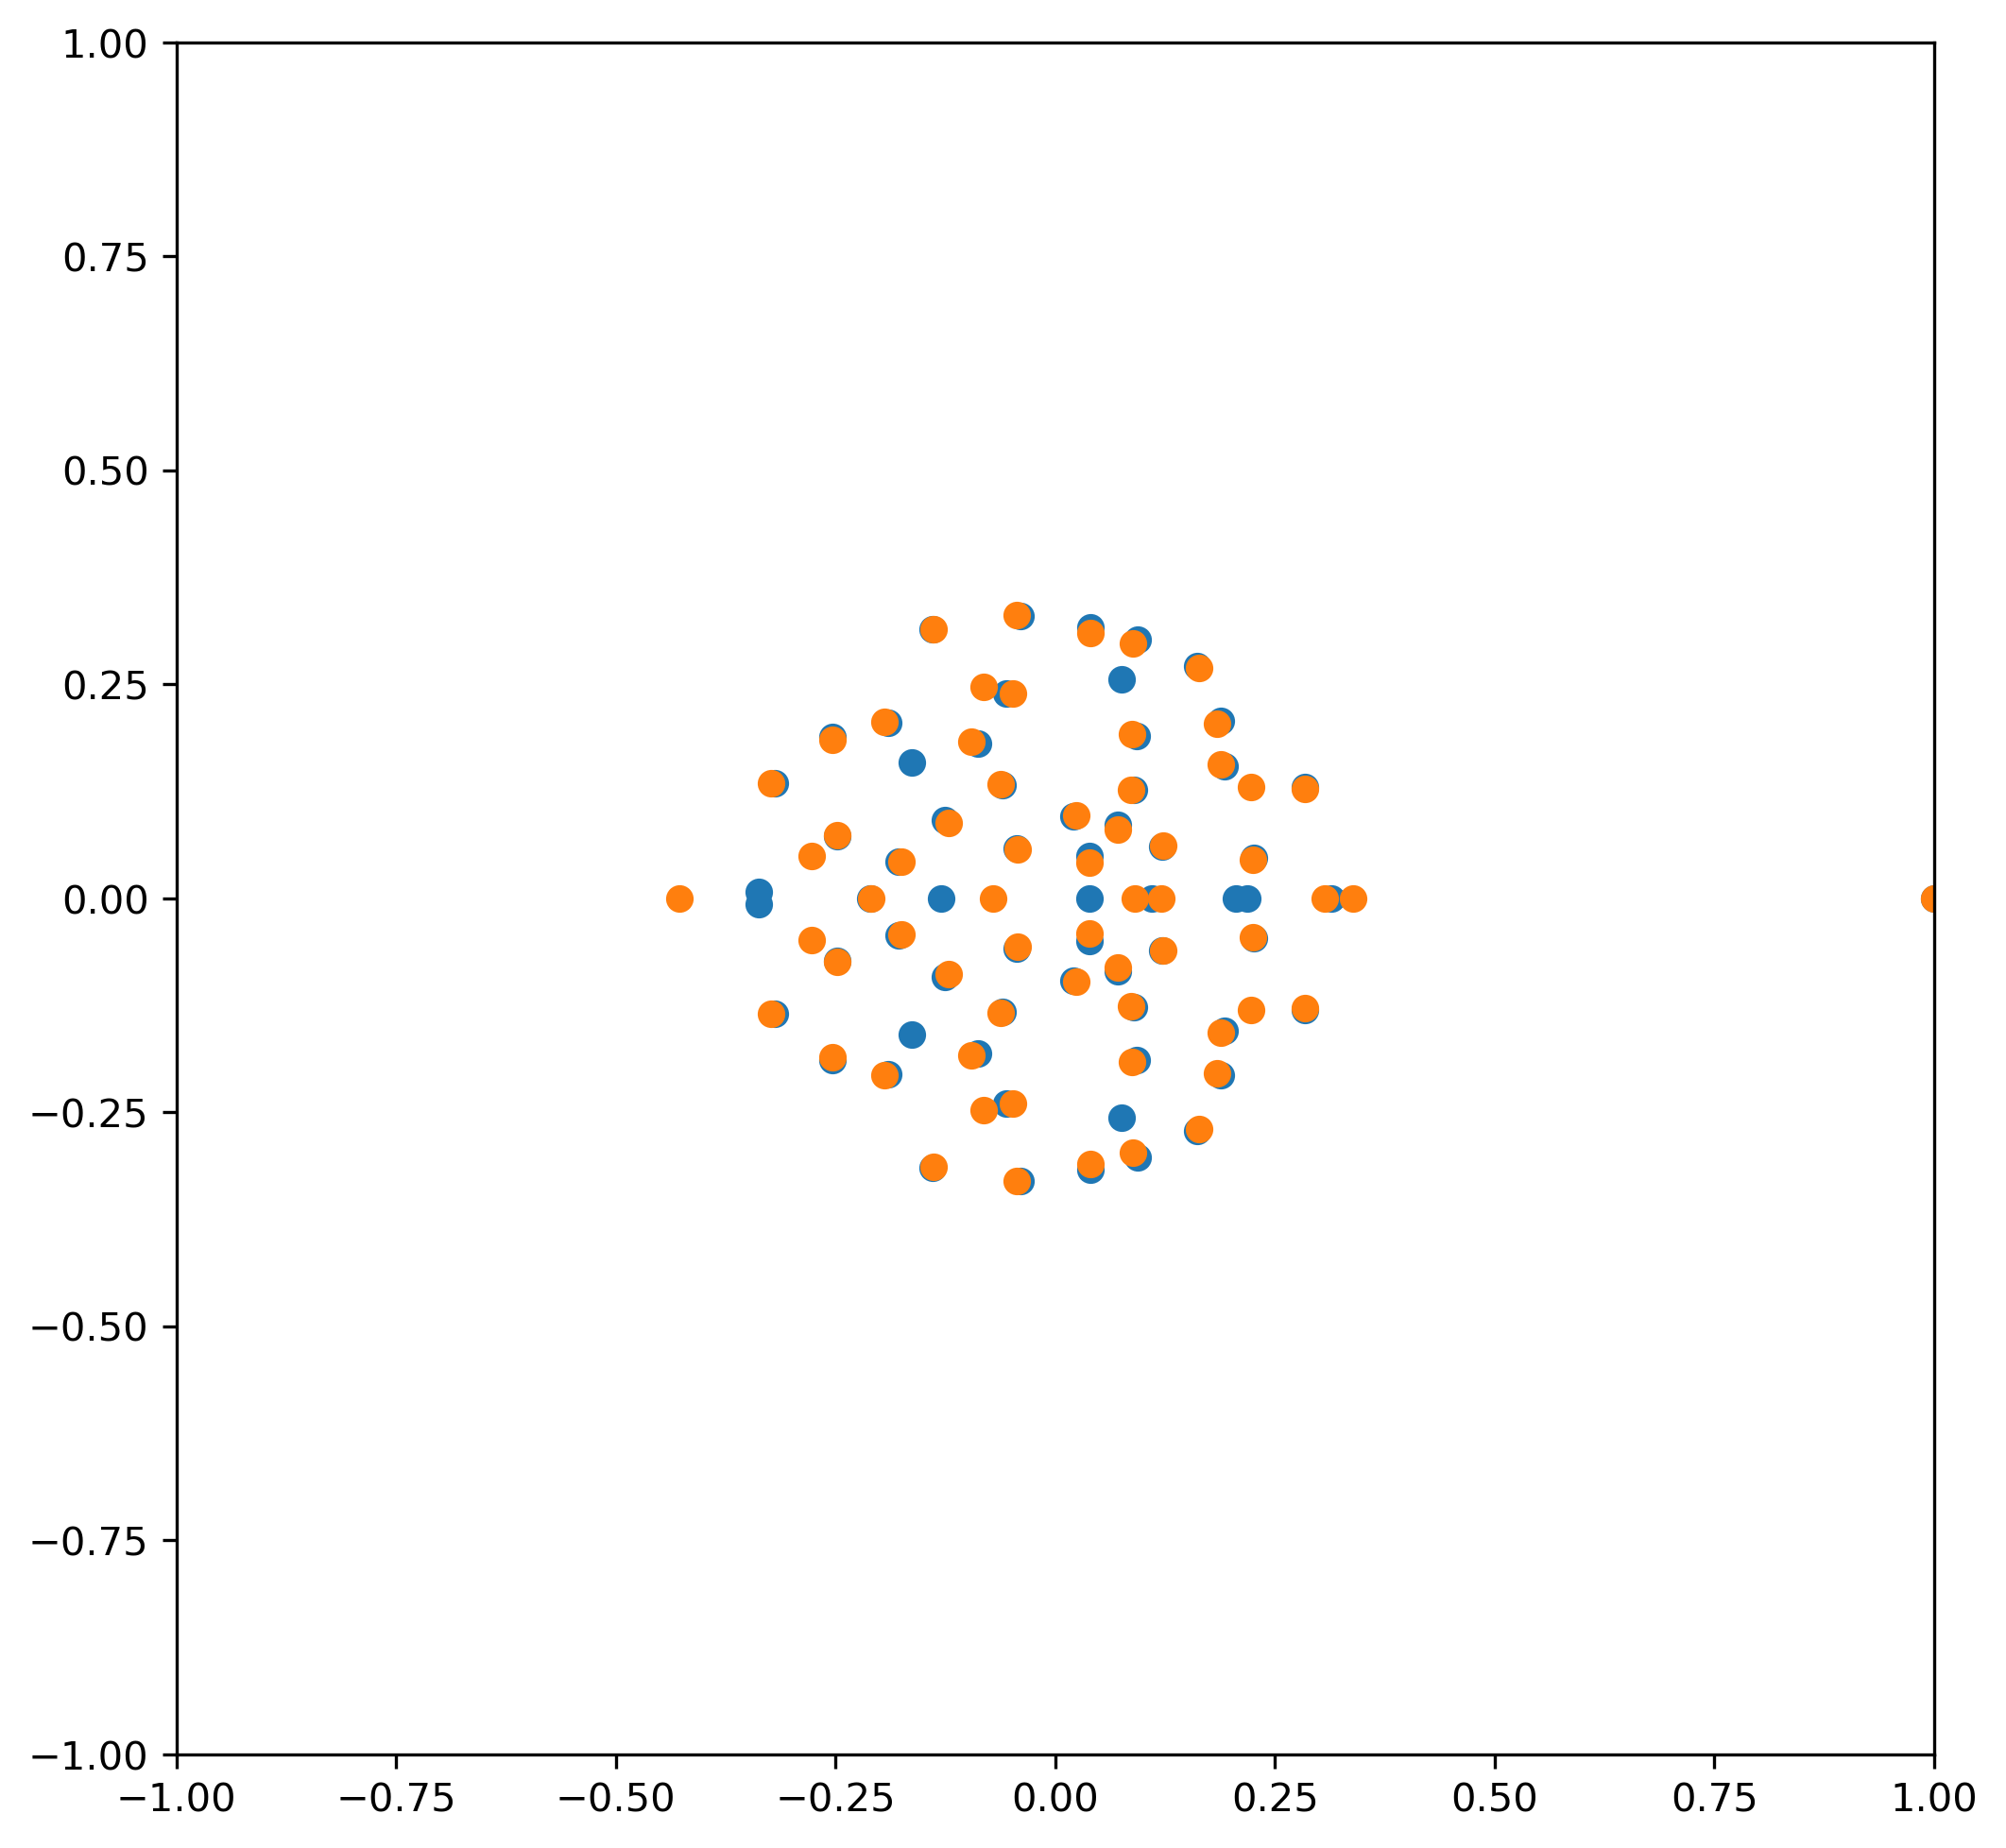

In [10]:
choi_target1 = maps_to_choi([kraus_target])
choi_model1 = maps_to_choi([kraus_model])

spectrum_target = choi_spectrum(choi_target1)
spectrum_model = choi_spectrum(choi_model1)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(*spectrum_target, "o")
plt.plot(*spectrum_model, "o")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()